## Task 4
### Visualize the routes that are mapped from the trajectories of the first 15 trips on the road network (together with different colors or separately).

### Requirements Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install osmnx

In [ ]:
import pandas as pd
import osmnx as ox
import matplotlib.pyplot as plt
from shapely.wkt import loads

### Loading saved data from Task 3

In [ ]:
df = pd.read_csv("/content/matched_results.csv")

In [ ]:
df = df.head(15)

In [ ]:
df

,Unnamed: 0,t_number,cpath,opath,offset,length,spdist,mgeom
0,0,1372636858620000589,"[100079, 4157, 100080, 1043, 678, 10660, 13275...","[100079, 100079, 100080, 100080, 1043, 1043, 6...","[0.0014231665578588988, 0.0015691934394630204,...","[0.0027285590517994785, 0.0027285590517994785,...","[0.0, 0.00014602688160412157, 0.00446739375146...","LINESTRING(-8.6186233 41.141456,-8.6183463 41...."
1,1,1372637303620000596,"[36632, 175421, 159262, 6492, 39203, 734, 3916...","[36632, 36632, 6492, 39203, 734, 734, 39179, 3...","[0.0016796436151079747, 0.00218429640344649, 0...","[0.0023412582349148416, 0.0023412582349148416,...","[0.0, 0.0005046527883385151, 0.001859995374783...","LINESTRING(-8.6398592 41.159752,-8.6400962 41...."
2,2,1372636951620000320,[],[],[],[],[],LINESTRING()
3,3,1372636854620000520,[],[],[],[],[],LINESTRING()
4,4,1372637091620000337,"[154099, 154097, 106567, 154102, 7700, 7703, 7...","[154099, 154099, 154097, 7703, 7704, 130393, 7...","[0.0008438441597467526, 0.0008438441597467526,...","[0.0008438441597467525, 0.0008438441597467525,...","[0.0, 0.0, 0.0005535986566614134, 0.0016052888...","LINESTRING(-8.6457599 41.180528,-8.645788 41.1..."
5,5,1372636965620000231,"[132762, 108977, 107446, 105554, 680, 99928, 9...","[132762, 108977, 680, 680, 99928, 99928, 99928...","[0.00023946362022200497, 0.0004898861043014099...","[0.00044379389003650413, 0.0008129144353229792...","[0.0, 0.000694216374115909, 0.0016209419036414...","LINESTRING(-8.6155138 41.140709,-8.6154822 41...."
6,6,1372637210620000456,"[177473, 979, 5033, 14957, 7006, 15006, 157181...","[177473, 979, 979, 5033, 7006, 157180, 157177,...","[0.00011158469852924573, 0.001445330082805124,...","[0.0005122965922670534, 0.005004840200782226, ...","[0.0, 0.0018460419765429317, 0.001822011920992...","LINESTRING(-8.5794961 41.145933,-8.5795184 41...."
7,7,1372637299620000011,"[1292, 1319, 5992, 108411, 1317, 108455, 97949...","[1292, 1292, 1319, 108411, 108411, 108455, 108...","[0.00021142027624969305, 0.0005433563571710755...","[0.0014652773490172898, 0.0014652773490172898,...","[0.0, 0.00033193608092138246, 0.00133110188370...","LINESTRING(-8.6176423 41.146162,-8.6173603 41...."
8,8,1372637274620000403,"[680, 99929, 682, 105555, 107447, 108976, 1327...","[680, 680, 99929, 99929, 682, 107447, 132762, ...","[0.0018076231774055028, 0.0018138334505710108,...","[0.003858245840009431, 0.003858245840009431, 0...","[0.0, 6.2102731655079915e-06, 0.00430105701209...","LINESTRING(-8.6116685 41.141387,-8.6108132 41...."
9,9,1372637905620000320,[],[],[],[],[],LINESTRING()


In [ ]:
# converting WKT string to geomentry
def safe_load_wkt(wkt):
    try:
        geom = loads(wkt)
        return geom
    except:
        return None

df["mgeom_geom"] = df["mgeom"].apply(safe_load_wkt)

### Visualization of mapped routes for Baseline Model (Task 3)

In [ ]:
G1 = ox.graph_from_place("Porto", network_type='drive', which_result=1)

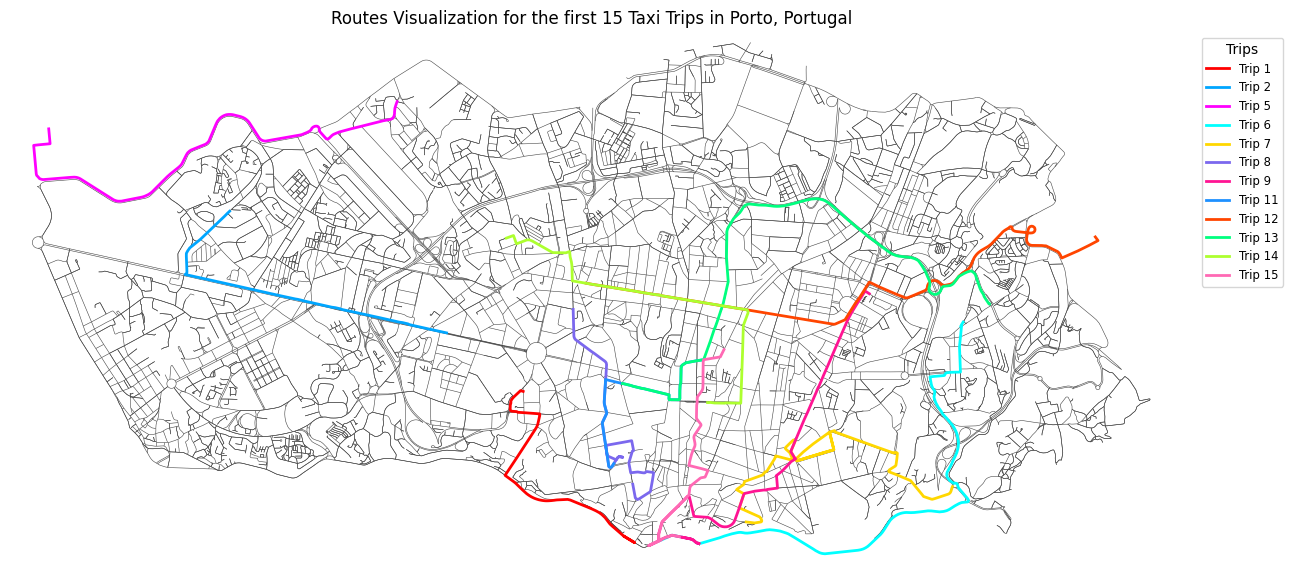

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))

# loading map for porto
ox.plot_graph(
    G1,
    ax=ax,
    node_size=0,
    edge_color="#444444",
    edge_linewidth=0.4,
    bgcolor="white",
    show=False,
    close=False,
)

# Unique trip IDs
trip_ids = df["t_number"].unique()

# custom color for each trip
colors = [
    "#FF0000", "#00A6FF", "#00CC00", "#FF8C00", "#FF00FF",
    "#00FFFF", "#FFD700", "#7B68EE", "#FF1493", "#A52A2A",
    "#1E90FF", "#FF4500", "#00FF7F", "#ADFF2F", "#FF69B4"
]

# plotting each trip iteratively
i = 1
for color, trip_id in zip(colors, trip_ids):
    row = df[df["t_number"] == trip_id].iloc[0]
    line = row["mgeom_geom"]

    if line != None:
      # Extract x, y
      x, y = line.xy

      ax.plot(
          x,
          y,
          linewidth=2,
          color=color,
          label=f"Trip {i}"
      )
    i = i + 1

plt.legend(title="Trips", fontsize='small', bbox_to_anchor=(1.1, 1))
plt.title("Routes Visualization for the first 15 Taxi Trips in Porto, Portugal")
plt.show()


### Loading saved data from Task 6
##### To show improved coverage

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/urban_project2/output_task3/match_result_detailed.csv")

In [ ]:
df = df.head(15)
df

,t_number,cpath,opath,offset,length,spdist,mgeom
0,1,"[100079, 4157, 100080, 1043, 678, 10660, 13275...","[100079, 100079, 100080, 100080, 1043, 1043, 6...","[0.0014231665578588988, 0.0015691934394630204,...","[0.0027285590517994785, 0.0027285590517994785,...","[0.0, 0.00014602688160412157, 0.00446739375146...","LINESTRING(-8.6186233 41.141456,-8.6183463 41...."
1,2,"[36632, 175421, 159262, 6492, 39203, 734, 3916...","[36632, 36632, 6492, 39203, 734, 734, 39179, 3...","[0.0016796436151079747, 0.00218429640344649, 0...","[0.0023412582349148416, 0.0023412582349148416,...","[0.0, 0.0005046527883385151, 0.001859995374783...","LINESTRING(-8.6398592 41.159752,-8.6400962 41...."
2,3,"[105554, 682, 105555, 107447, 108976, 132763, ...","[105554, 682, 105555, 107447, 132763, 132763, ...","[0.0008468421873897884, 0.0, 0.000226291558990...","[0.000888144124394028, 0.000904678071618781, 0...","[0.0, 4.1301937004239596e-05, 0.00113096963060...","LINESTRING(-8.6134727 41.141402,-8.613438 41.1..."
3,4,"[79276, 968, 969, 958, 177473, 979, 5033, 1495...","[79276, 79276, 79276, 79276, 79276, 79276, 792...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00106030...","[0.008715180515387088, 0.008715180515387088, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00106030...","LINESTRING(-8.5747537 41.151899,-8.5747993 41...."
4,5,"[154099, 154097, 106567, 154102, 7700, 7703, 7...","[154099, 154099, 154097, 7703, 7704, 130393, 7...","[0.0008438441597467526, 0.0008438441597467526,...","[0.0008438441597467525, 0.0008438441597467525,...","[0.0, 0.0, 0.0005535986566614134, 0.0016052888...","LINESTRING(-8.6457599 41.180528,-8.645788 41.1..."
5,6,"[132762, 108977, 107446, 105554, 680, 99928, 9...","[132762, 108977, 680, 680, 99928, 99928, 99928...","[0.00023946362022200497, 0.0004898861043014099...","[0.00044379389003650413, 0.0008129144353229792...","[0.0, 0.000694216374115909, 0.0016209419036414...","LINESTRING(-8.6155138 41.140709,-8.6154822 41...."
6,7,"[177473, 979, 5033, 14957, 7006, 15006, 157181...","[177473, 979, 979, 5033, 7006, 157180, 157177,...","[0.00011158469852924573, 0.001445330082805124,...","[0.0005122965922670534, 0.005004840200782226, ...","[0.0, 0.0018460419765429317, 0.001822011920992...","LINESTRING(-8.5794961 41.145933,-8.5795184 41...."
7,8,"[1292, 1319, 5992, 108411, 1317, 108455, 97949...","[1292, 1292, 1319, 108411, 108411, 108455, 108...","[0.00021142027624969305, 0.0005433563571710755...","[0.0014652773490172898, 0.0014652773490172898,...","[0.0, 0.00033193608092138246, 0.00133110188370...","LINESTRING(-8.6176423 41.146162,-8.6173603 41...."
8,9,"[680, 99929, 682, 105555, 107447, 108976, 1327...","[680, 680, 99929, 99929, 682, 107447, 132762, ...","[0.0018076231774055028, 0.0018138334505710108,...","[0.003858245840009431, 0.003858245840009431, 0...","[0.0, 6.2102731655079915e-06, 0.00430105701209...","LINESTRING(-8.6116685 41.141387,-8.6108132 41...."
9,10,"[4158, 132762, 108977, 107446, 105554, 680, 99...","[4158, 107446, 105554, 680, 110373, 27046, 270...","[0.0016226405358298083, 0.00011315754673823586...","[0.0018045575582419633, 0.0002960438564706457,...","[0.0, 0.0015517828945098744, 0.000993739426604...","LINESTRING(-8.6159128 41.140574,-8.6157409 41...."


In [ ]:
# convetting WKT string to geometry
df["mgeom_geom"] = df["mgeom"].apply(safe_load_wkt)

### Visualization of mapped routes for FMM + ST-Match (Task 6)

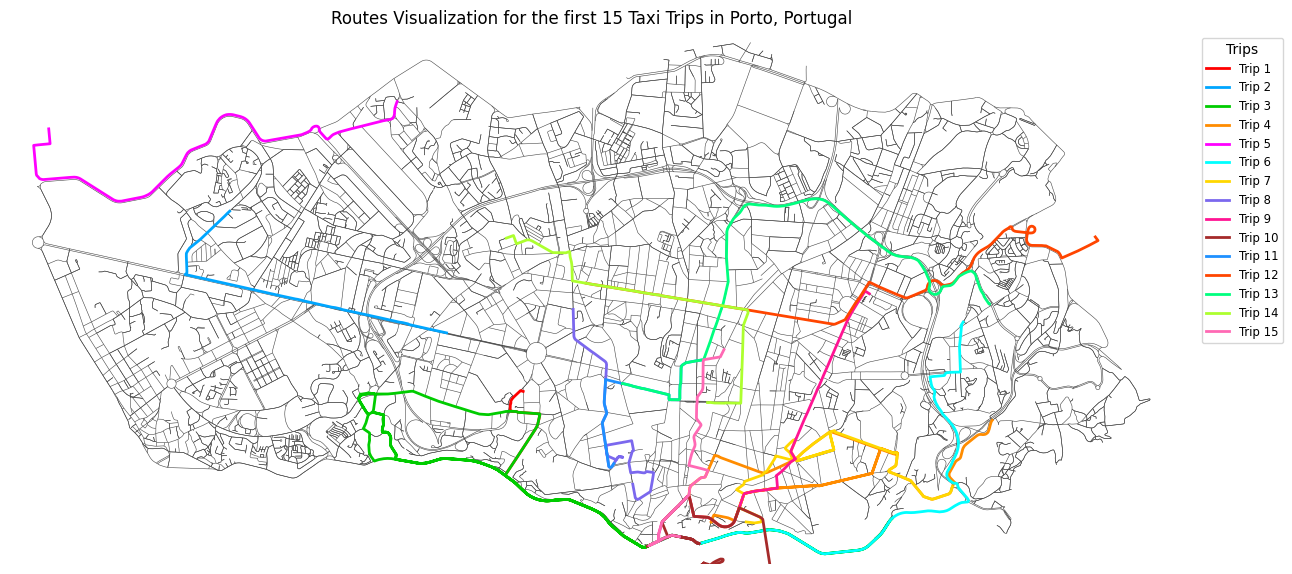

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))

# loading map for porto
ox.plot_graph(
    G1,
    ax=ax,
    node_size=0,
    edge_color="#444444",
    edge_linewidth=0.4,
    bgcolor="white",
    show=False,
    close=False,
)

# Unique trip IDs
trip_ids = df["t_number"].unique()

# custom color for each trip
colors = [
    "#FF0000", "#00A6FF", "#00CC00", "#FF8C00", "#FF00FF",
    "#00FFFF", "#FFD700", "#7B68EE", "#FF1493", "#A52A2A",
    "#1E90FF", "#FF4500", "#00FF7F", "#ADFF2F", "#FF69B4"
]

# plotting each trip iteratively
i = 1
for color, trip_id in zip(colors, trip_ids):
    row = df[df["t_number"] == trip_id].iloc[0]
    line = row["mgeom_geom"]

    if line != None:
      # Extract x, y
      x, y = line.xy

      ax.plot(
          x,
          y,
          linewidth=2,
          color=color,
          label=f"Trip {i}"
      )
    i = i + 1

plt.legend(title="Trips", fontsize='small', bbox_to_anchor=(1.1, 1))
plt.title("Routes Visualization for the first 15 Taxi Trips in Porto, Portugal")
plt.show()
